In [1]:
import pandas as pd

C:\Users\hp\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
df = pd.read_csv('train.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


# 2. Missing data not at random(MCNR) : Syystemetic missing values
There r some relationship between the data missing and any other values, observed or missing within the dataset.

In [17]:
import numpy as np
df['Cabin_null'] = np.where(df['Cabin'].isnull(),1,0) # reppalce none vaue with 1 and 0
 

In [18]:
#find the pervcentage of nul value
df['Cabin_null'].mean()

0.7710437710437711

In [22]:
df['Cabin_null']

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: Cabin_null, Length: 891, dtype: int32

In [21]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_null'],
      dtype='object')

In [24]:
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

# Missing at Random (MAR)

In [ ]:
Men -- hide their salary
women -- hide their age

In [ ]:
# all the technique of handling missing values:
1. Mean-Median replacememnt
2. Random sample Imputation
3. Capturing NAN values with a new feature
4. End of distribution imputation
5. Arbitary Imputation
6. Frequent category imputataion

# Mean- median -Mode imputation

When to apply?
Mean- median -Mode imputation has assmption that the data r missing competly at random(MCAR).
We solve it by replacing the NAN with the most frequwent occurance of the variable

In [36]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [38]:
# percentage of missing vaives
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [81]:
# Create a function which  imputes NAN values
def impute_nan(df, variable, median):
    df[variabe+"_median"]= df[variable].fillna(median)

In [82]:
# cal median value
median = df.Age.median()
median

28.0

In [89]:
impute_nan(df, 'Age', 'median')
df.head()

NameError: name 'variabe' is not defined

In [77]:
# lets check after imptuatuon the new featre in AGE  has created is changed(SD or Median)
print(df['Age'].std())
print(df['Age_median'].std())

13.019696550973201
13.019696550973201


In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

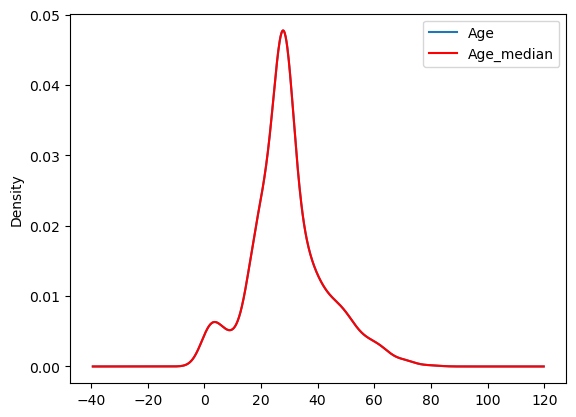

In [80]:
fig = plt.figure()
ax =  fig.add_subplot(111)
df['Age'].plot(kind = 'kde', ax =ax) # kerna density estimator
df.Age_median.plot(kind ='kde', ax =ax , color ='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc ='best')

#  Advatage ad disadvantage of Mean/Median/Mode Imputation

# Advantages

1. Easy to implememnt
2. Fast way to obtain the complete dataset

# Disadvantage

1. Change or distort in the original variable
2. Impatcs corelaltion